In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Upload the dataset
from google.colab import files
uploaded=files.upload()


Saving laptop.csv to laptop.csv


In [4]:

# To pridict price of the laptop - Target is continuous
# supervised machine learning with Regreson model
# Methodology- CRISP-ML(Q)

# 1.Business and Data understandind
# Read the data set
df=pd.read_csv("laptop.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,1302.0,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [6]:
df.shape

(1303, 13)

In [ ]:
# Data set information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [7]:
# Summury of the statistics
df.describe()

,Unnamed: 0.1,Unnamed: 0,Price
count,1303.00000,1273.000000,1273.000000
mean,651.00000,652.674784,59955.814073
std,376.28801,376.493027,37332.251005
min,0.00000,0.000000,9270.720000
25%,325.50000,327.000000,31914.720000
50%,651.00000,652.000000,52161.120000
75%,976.50000,980.000000,79333.387200
max,1302.00000,1302.000000,324954.720000


In [8]:
#2.Data preprocessing
# checking the data types
# checking for the duplicates
# checking for the null values or missing values
# checking for the outliers
# feature engeneering - correlation
# encoding of the data

# checking the data types
df.dtypes


,0
Unnamed: 0.1,int64
Unnamed: 0,float64
Company,object
TypeName,object
Inches,object
ScreenResolution,object
Cpu,object
Ram,object
Memory,object
Gpu,object


In [9]:
# checking for the duplicates

df.duplicated().sum()

np.int64(0)

In [10]:
# checking for the null and missing values

df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,30
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30


In [11]:
df.isnull().sum()/len(df)*100

,0
Unnamed: 0.1,0.000000
Unnamed: 0,2.302379
Company,2.302379
TypeName,2.302379
Inches,2.302379
ScreenResolution,2.302379
Cpu,2.302379
Ram,2.302379
Memory,2.302379
Gpu,2.302379


In [12]:
df=df.dropna()
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


In [ ]:
# insights:
# missing value percentage in between-2 to 3%% - so drop the null values

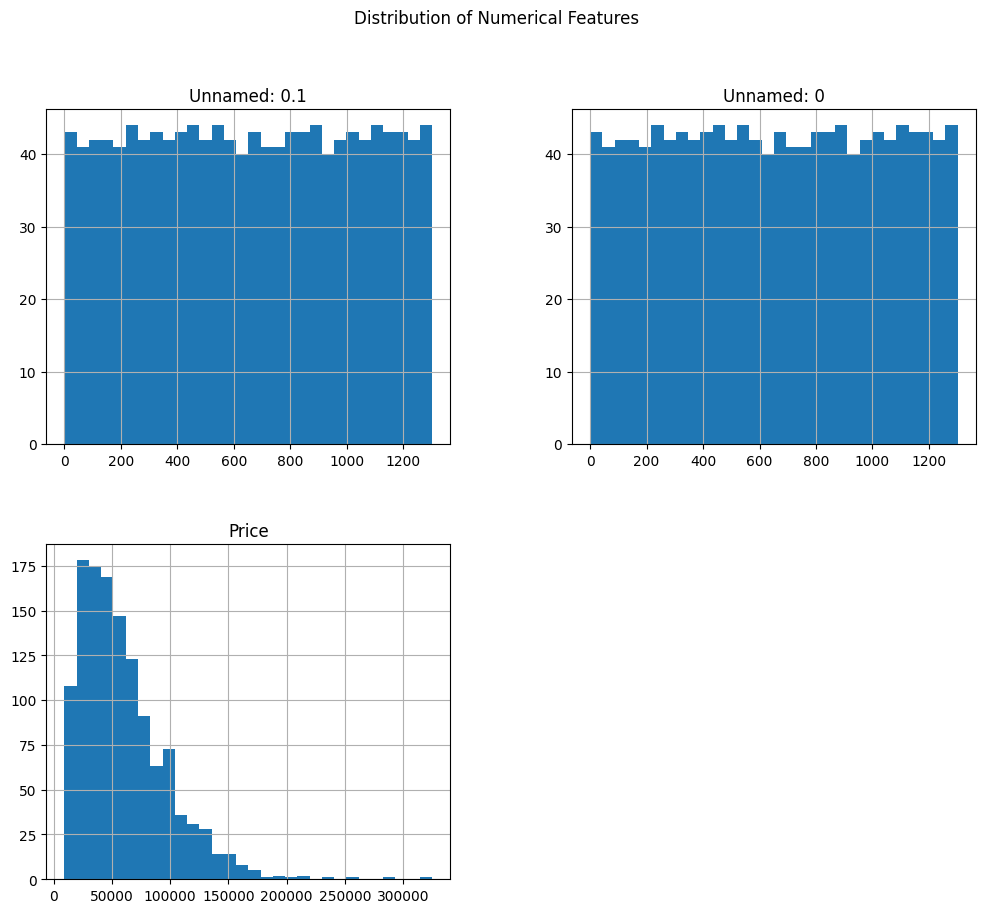

In [13]:
# check distribution of data
df.hist(figsize=(12,10),bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.xlabel("company")
plt.ylabel("price")
plt.show()

In [ ]:
# insights:
# plot to check the distibution of the data - using histogram
# histogram for numerical columns
# above distribution is not a normal distribution
# we go with median - fill with missing values with median

In [ ]:
# 4.checking for the outliers
# 1. IQR - using remove the out liers
# 2.z-score - using remove the outliers
# 3.winsorization- retain the outliers
# using BOX-plot.

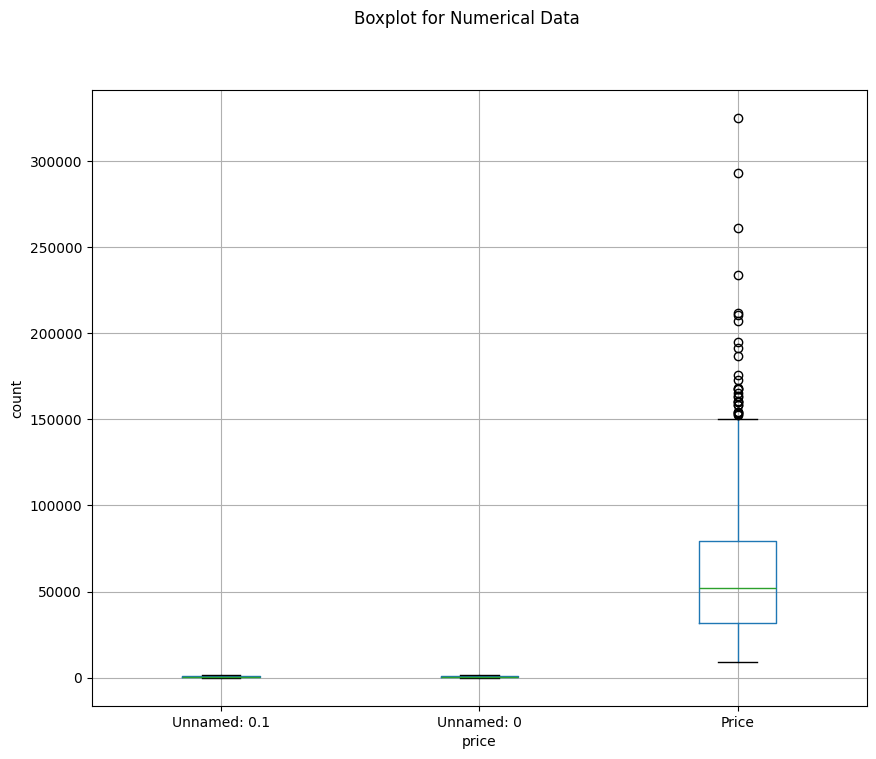

In [14]:
df.boxplot(figsize=(10,8))
plt.suptitle("Boxplot for Numerical Data",fontsize=12)
plt.xlabel("price")
plt.ylabel("count")
plt.show()

In [15]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [19]:
df=df_no_outliers.copy()

In [20]:
from scipy import stats
z_scores = np.abs(stats.zscore(df['Price']))
df_no_outliers = df[z_scores < 3]
print(df_no_outliers)

      Unnamed: 0.1  Unnamed: 0 Company            TypeName Inches  \
0                0         0.0   Apple           Ultrabook   13.3   
1                1         1.0   Apple           Ultrabook   13.3   
2                2         2.0      HP            Notebook   15.6   
3                3         3.0   Apple           Ultrabook   15.4   
4                4         4.0   Apple           Ultrabook   13.3   
...            ...         ...     ...                 ...    ...   
1298          1298      1298.0  Lenovo  2 in 1 Convertible     14   
1299          1299      1299.0  Lenovo  2 in 1 Convertible   13.3   
1300          1300      1300.0  Lenovo            Notebook     14   
1301          1301      1301.0      HP            Notebook   15.6   
1302          1302      1302.0    Asus            Notebook   15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2              

In [21]:
df.Price.value_counts()

,count
Price,
58554.72,14
95850.72,14
79866.72,14
26586.72,11
63882.72,11
...,...
16197.12,1
40439.52,1
98994.24,1


In [22]:
df.shape

(1261, 13)

In [23]:
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0


In [ ]:
# 5.Feature Engineering
# how columns are co related to each other
# no correlation between the column - only numeric column= price

In [ ]:
#6. Feature scaling - Normalize the data

In [24]:
# Encoding the data

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Selecting categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

In [25]:
# Label Encoding
df_label_encoded = df.copy()
label_encoder = LabelEncoder()
for col in cat_cols:
    df_label_encoded[col] = label_encoder.fit_transform(df_label_encoded[col])

In [26]:
# Display results
print("Label Encoded Data:")
print(df_label_encoded.head())
print("\nUnique Values in Each Column:")
print(df_label_encoded.shape)

Label Encoded Data:
   Unnamed: 0.1  Unnamed: 0  Company  TypeName  Inches  ScreenResolution  Cpu  \
0             0         0.0        1         4       7                23   65   
1             1         1.0        1         4       7                 1   63   
2             2         2.0        7         3      14                 8   74   
3             3         3.0        1         4      13                25   85   
4             4         4.0        1         4       7                23   67   

   Ram  Memory  Gpu  OpSys  Weight        Price  
0    9       4   58      8      39   71378.6832  
1    9       2   51      8      36   47895.5232  
2    9      15   53      4      75   30636.0000  
3    1      28    9      8      72  135195.3360  
4    9      15   59      8      39   96095.8080  

Unique Values in Each Column:
(1261, 13)


In [27]:
# One-Hot Encoding
df_one_hot_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [28]:
print("\nOne-Hot Encoded Data:")
print(df_one_hot_encoded.head())
print(df_one_hot_encoded.shape)


One-Hot Encoded Data:
   Unnamed: 0.1  Unnamed: 0        Price  Company_Apple  Company_Asus  \
0             0         0.0   71378.6832           True         False   
1             1         1.0   47895.5232           True         False   
2             2         2.0   30636.0000          False         False   
3             3         3.0  135195.3360           True         False   
4             4         4.0   96095.8080           True         False   

   Company_Chuwi  Company_Dell  Company_Fujitsu  Company_Google  Company_HP  \
0          False         False            False           False       False   
1          False         False            False           False       False   
2          False         False            False           False        True   
3          False         False            False           False       False   
4          False         False            False           False       False   

   ...  Weight_4.5kg  Weight_4.6kg  Weight_4kg  Weight_5.4kg  W

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# 3.Model building

# Define features (X) and target variable (y)
X = df_label_encoded.drop(columns=['Price'])  # Features
y = df_label_encoded['Price']  # Target variable

In [33]:
# Perform train-test split (Stratified for imbalanced data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print the class distribution
print("Train set class distribution:\n", y_train.value_counts(normalize=True))
print("\nTest set class distribution:\n", y_test.value_counts(normalize=True))

Train set class distribution:
 Price
79866.7200    0.013889
95850.7200    0.013889
58554.7200    0.010913
69210.7200    0.009921
63882.7200    0.009921
                ...   
68145.1200    0.000992
38148.4800    0.000992
67239.3600    0.000992
34433.2656    0.000992
40066.5600    0.000992
Name: proportion, Length: 645, dtype: float64

Test set class distribution:
 Price
61218.7200    0.011858
24455.5200    0.011858
58554.7200    0.011858
33513.1200    0.011858
53226.7200    0.011858
                ...   
47893.3920    0.003953
27899.0064    0.003953
30103.2000    0.003953
38787.8400    0.003953
64202.4000    0.003953
Name: proportion, Length: 215, dtype: float64


In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error,r2_score

In [37]:
# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# R-squared (goodness of fit)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 714116605.1144669
R-squared: 0.4456605744033687


In [38]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: -33570.55878844127
Coefficients: [ 3.35636225e+00  3.35636225e+00  8.36811242e+01 -3.82567470e+01
  1.69058295e+02  8.86676568e+02  5.27534302e+02 -2.22203634e+03
  5.62436853e+02  2.65445483e+02  7.04481387e+03 -6.50639932e+01]


In [ ]:
#visuvalize the result

plt.scatter(X_test, y_test, color='blue',linewidths=3, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.show()